<a href="https://colab.research.google.com/github/Lovely000chauhan/E-fitness-website/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:
# create test subdirectory
test_subdir = os.path.join(test_dir, 'c_and_d')

if not os.path.exists(test_subdir):
  os.mkdir(test_subdir)

# move test images into test subdirectory so that the flow_from_directory method can find them
for filename in os.listdir(test_dir):
  if not '.' in filename:
    continue
  old_path_name = os.path.join(test_dir, filename)
  new_path_name = os.path.join(test_subdir, filename)
  if not os.path.exists(new_path_name):
    os.rename(old_path_name, new_path_name)

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', batch_size=batch_size)
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', batch_size=batch_size)
test_data_gen = test_image_generator.flow_from_directory(test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', batch_size=batch_size, shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


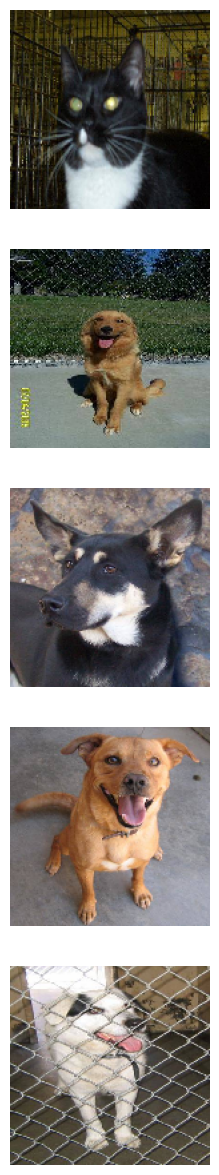

In [8]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, brightness_range=(0.7, 1.3), shear_range=10.0, zoom_range=0.2, horizontal_flip=True)


Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


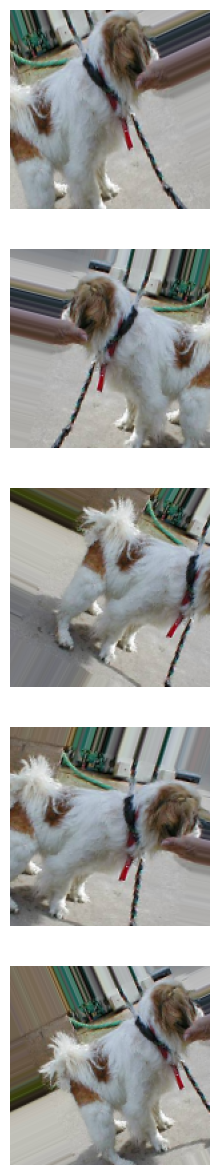

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory=train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [12]:
model = Sequential([
  Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  MaxPooling2D(2, 2),
  Conv2D(32, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dropout(0.5),
  Dense(512, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x=train_data_gen, steps_per_epoch=8, epochs=epochs, validation_data=val_data_gen, validation_steps=8, verbose=1)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 136s 8s/step - accuracy: 0.5000 - loss: 0.9587 - val_accuracy: 0.5022 - val_loss: 0.6911
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:40 7s/step - accuracy: 0.4609 - loss: 0.7004

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.4609 - loss: 0.7004 - val_accuracy: 0.4808 - val_loss: 0.6899
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 190s 8s/step - accuracy: 0.5076 - loss: 0.6905 - val_accuracy: 0.5759 - val_loss: 0.6825
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.5469 - loss: 0.6857 - val_accuracy: 0.5673 - val_loss: 0.6846
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 130s 8s/step - accuracy: 0.5445 - loss: 0.6910 - val_accuracy: 0.5592 - val_loss: 0.6898
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 348ms/step - accuracy: 0.5391 - loss: 0.6925 - val_accuracy: 0.6442 - val_loss: 0.6880
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 139s 8s/step - accuracy: 0.5575 - loss: 0.6889 - val_accuracy: 0.5078 - val_loss: 0.7195
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.4453 - loss: 0.7756 - val_accuracy: 0.4808 - val_loss: 0.7226
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 168s 8s/step - accuracy: 0.5287 - loss: 0.6894 - val_accuracy: 0.5580 - val_loss:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# probabilities = model.predict_classes(test_data_gen) # method deprecated
# Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

# don't need to predict classes here, just get raw probabilities
array_probabilities = model.predict(test_data_gen)
probabilities = [i[0] for i in array_probabilities]

In [ ]:
test_images, _ = next(test_data_gen)

plotImages(test_images, probabilities=probabilities)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0
for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct += 1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying!")
